In [117]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

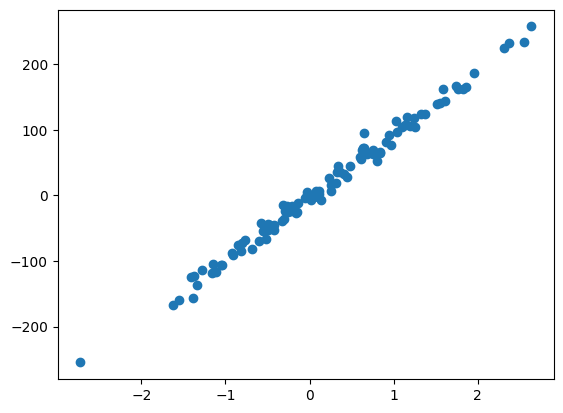

In [118]:
x, y = make_regression(n_samples = 100, n_features=1,noise=10)
plt.scatter(x,y)

In [134]:
print(x.shape)
y = y.reshape(y.shape[0], 1 )
print(y.shape)
type(y)

(100, 1)
(100, 1)


numpy.ndarray

In [120]:
#matrice X
X = np.hstack((x,np.ones(x.shape)))
X

array([[ 0.45046865,  1.        ],
       [-0.5240336 ,  1.        ],
       [ 1.19174459,  1.        ],
       [-0.28507686,  1.        ],
       [-0.80865668,  1.        ],
       [-0.67937655,  1.        ],
       [-0.76639435,  1.        ],
       [ 0.11331403,  1.        ],
       [ 0.63938276,  1.        ],
       [ 1.32392533,  1.        ],
       [-0.21069638,  1.        ],
       [ 1.73736709,  1.        ],
       [-0.60008087,  1.        ],
       [-0.57514556,  1.        ],
       [ 0.94751553,  1.        ],
       [-2.72644818,  1.        ],
       [-0.13823431,  1.        ],
       [-0.41938021,  1.        ],
       [ 0.33997679,  1.        ],
       [ 0.22956265,  1.        ],
       [ 0.75453147,  1.        ],
       [-1.16295218,  1.        ],
       [ 0.02089227,  1.        ],
       [ 1.03654089,  1.        ],
       [-0.26942279,  1.        ],
       [-1.05191096,  1.        ],
       [-0.33251539,  1.        ],
       [ 1.03006747,  1.        ],
       [-0.49924184,

In [121]:
theta = np.random.randn(2,1) # regression linaire fx = ax+b 
print(theta)

[[-0.32110704]
 [ 0.83303933]]


# modele lineaire

In [122]:
def model(X,theta):
    return X.dot(theta) # F = X.θ      thetaθ

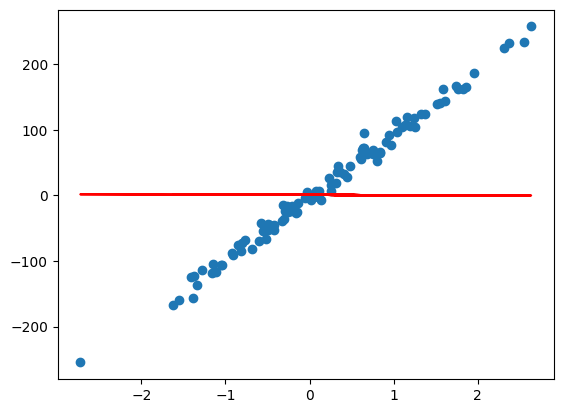

In [123]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')

# fonction cout

In [124]:
def cost_function(X,y,theta):
    m = len(y) # y a le m exemples dans le dataset
    return 1/(2*m) * np.sum((model(X,theta) - y )**2)

In [125]:
cost_function(X,y,theta)

np.float64(5082.078213159874)

## gradients et descente de gradient

In [126]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y )

In [127]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):

    cost_history = np.zeros(n_iterations)

    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# Finalement


In [128]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)

In [129]:
theta_final

array([[95.64903822],
       [-2.38402199]])

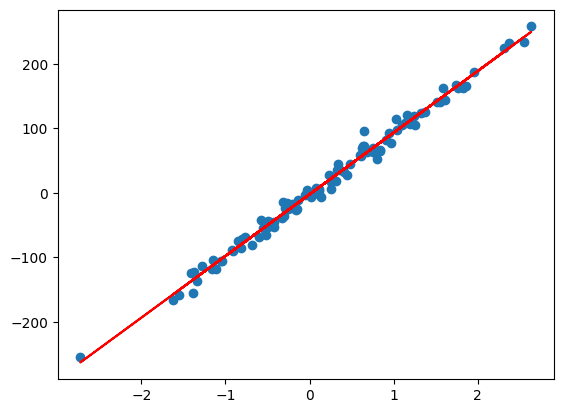

In [130]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

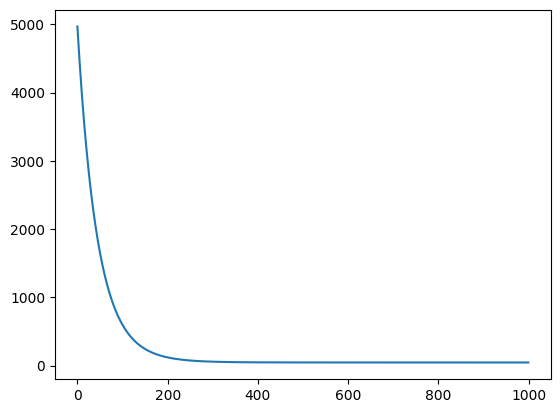

In [131]:
plt.plot(range(1000),cost_history)

cost history nous montre qu'on pouvait arreter l'algorithme vers l'iteration 400 selon les datas generees

### afficher le coefficient de determination
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - f(x))^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


In [132]:
def coef_determination(y,pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [133]:
print(coef_determination(y,predictions))

0.9909384426255259
